<a href="https://colab.research.google.com/github/ZerXXX0/Twitter-s-Tweets-NLP/blob/main/Kopie_von_NLP_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas nltk textblob scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
column_names  = ['id', 'Konteks','Response','Komentar']
df = pd.read_csv('/content/drive/MyDrive/twitter_training.csv', header=None, names=column_names)
df

,id,Konteks,Response,Komentar
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


Explorasi Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tampilkan lima baris pertama dataset
print("Lima Baris Pertama Dataset:")
print(df.head())
plt.show()

Lima Baris Pertama Dataset:
     id      Konteks  Response  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                            Komentar  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [ ]:
# Informasi dataset
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        74682 non-null  int64 
 1   Konteks   74682 non-null  object
 2   Response  74682 non-null  object
 3   Komentar  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [ ]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
                 id
count  74682.000000
mean    6432.586165
std     3740.427870
min        1.000000
25%     3195.000000
50%     6422.000000
75%     9601.000000
max    13200.000000


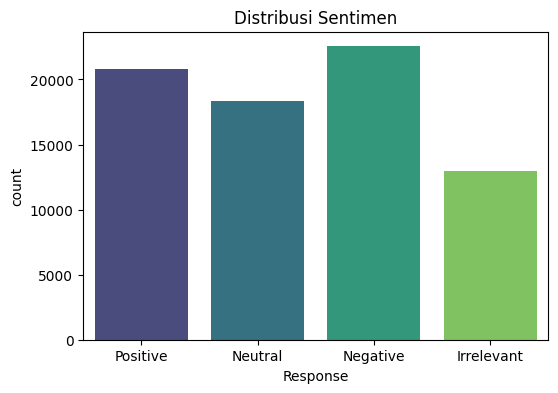

In [ ]:
# Distribusi sentimen
plt.figure(figsize=(6, 4))
sns.countplot(x='Response', data=df, palette='viridis')
plt.title('Distribusi Sentimen')
plt.show()

In [ ]:
#Hapus baris yang ada null
df = df.dropna(axis=0)

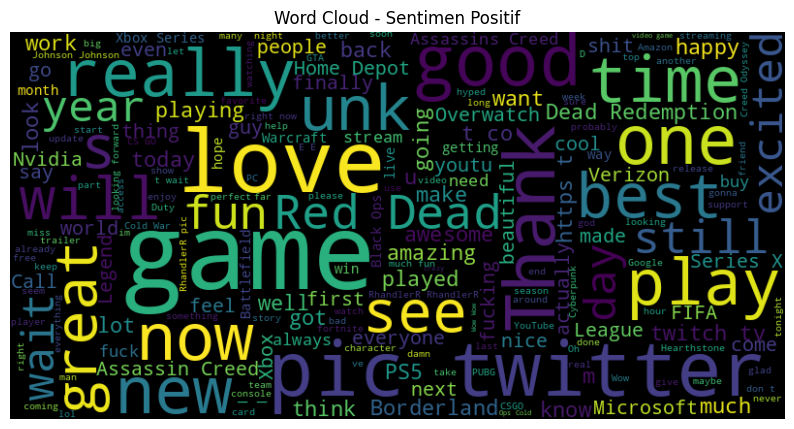

In [ ]:
# Word cloud untuk teks positif
from wordcloud import WordCloud

positive_texts = ' '.join(df[df['Response'] == 'Positive']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(positive_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Sentimen Positif')
plt.show()



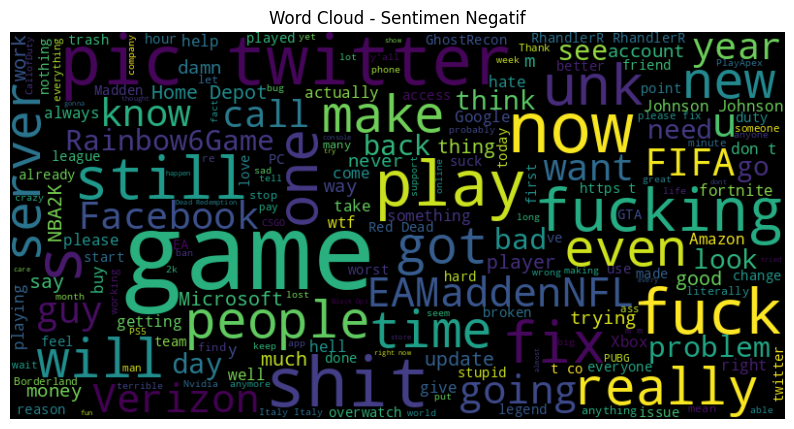

In [ ]:
# Word cloud untuk teks negatif
negative_texts = ' '.join(df[df['Response'] == 'Negative']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(negative_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Sentimen Negatif')
plt.show()

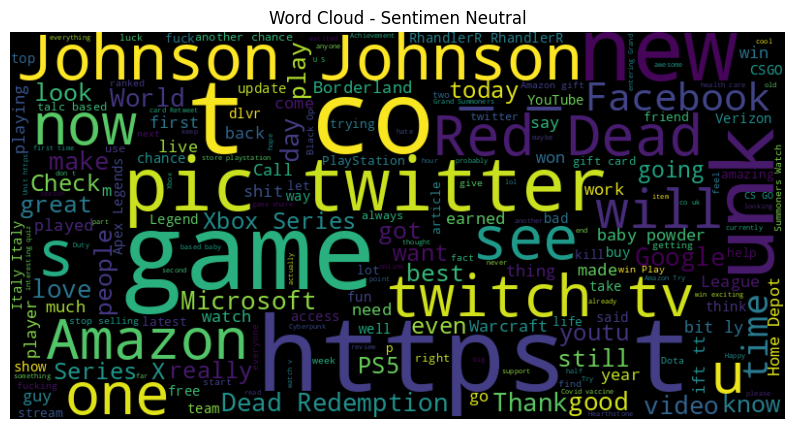

In [ ]:
# Word cloud untuk teks Neutral
negative_texts = ' '.join(df[df['Response'] == 'Neutral']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(negative_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Sentimen Neutral')
plt.show()

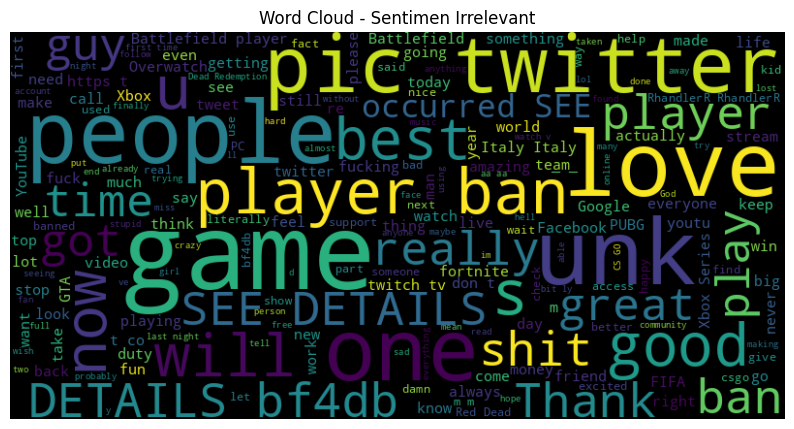

In [ ]:
# Word cloud untuk teks Neutral
negative_texts = ' '.join(df[df['Response'] == 'Irrelevant']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(negative_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Sentimen Irrelevant')
plt.show()

Data Processing

In [ ]:
#Memasukan Data validasi
column_names  = ['id', 'Konteks','Response','Komentar']
df_validation = pd.read_csv('/content/drive/MyDrive/twitter_validation.csv', header=None, names=column_names)

#Hapus baris yang ada null
df_validation = df_validation.dropna(axis=0)
df_validation

,id,Konteks,Response,Komentar
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing Teks
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['clean_Komentar'] = df['Komentar'].apply(preprocess_text)
df_validation['clean_Komentar'] = df_validation['Komentar'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-15-4539fd99271a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_Komentar'] = df['Komentar'].apply(preprocess_text)


In [ ]:
# Pembagian dataset
#X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Komentar'], test_size=0.2, random_state=42)


In [ ]:
# Menggunakan dataset yang telah dibagi dari file validasi
X_train, y_train = df['clean_Komentar'], df['Response']
X_test, y_test = df_validation['clean_Komentar'], df_validation['Response']

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Model Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

Model

In [ ]:
# Evaluasi Model
y_pred = nb_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.723
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.78      0.54      0.64       172
    Negative       0.66      0.83      0.74       266
     Neutral       0.81      0.63      0.71       285
    Positive       0.71      0.83      0.76       277

    accuracy                           0.72      1000
   macro avg       0.74      0.71      0.71      1000
weighted avg       0.74      0.72      0.72      1000



In [ ]:
# Import library yang diperlukan
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Fungsi untuk prediksi sentimen dengan empat kelas
def predict_sentiment(text):
    cleaned_text = preprocess_text(text)
    vectorized_text = tfidf_vectorizer.transform([cleaned_text])
    prediction = nb_model.predict(vectorized_text)[0]

    if prediction == 'Positive':
        return "Positive"
    elif prediction == 'Negative':
        return "Negative"
    elif prediction == 'Neutral':
        return "Neutral"
    elif prediction == 'Irrelevant':
        return "Irrelevant"
    else:
        return "Uncertain"  # Jika kelas tidak dikenali

# Contoh penggunaan:
text_to_predict = "I love Nasi Goreng"
result = predict_sentiment(text_to_predict)
print(result)


Positive


In [ ]:
# Uji Model dengan Input Pengguna
user_input = input("Masukkan teks untuk diuji sentimennya: ")
prediction_output = predict_sentiment(user_input)
print(f'Prediksi Sentimen: {prediction_output}')

Masukkan teks untuk diuji sentimennya: negawatt
Prediksi Sentimen: Negative


In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

import streamlit as st

st.write('Hello, *World!* :sunglasses:')

Overwriting app.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.943s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.447s
your url is: https://shiny-radios-add.loca.lt
^C


In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.30.130.55


In [ ]:
import streamlit as st
st.title("title")
st.text("yo")

2023-12-19 08:11:44.571 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()